In [1]:
import pandas as pd

from plotnine import ggplot, aes, geom_text, labs
from sklearn.manifold import TSNE
import torchtext.vocab as vocab
import torch

/usr/local/lib/python3.10/dist-packages/torchtext/vocab/__init__.py:4: UserWarning: 
/!\ IMPORTANT WARNING ABOUT TORCHTEXT STATUS /!\ 
Torchtext is deprecated and the last released version will be 0.18 (this one). You can silence this warning by calling the following at the beginnign of your scripts: `import torchtext; torchtext.disable_torchtext_deprecation_warning()`
/usr/local/lib/python3.10/dist-packages/torchtext/utils.py:4: UserWarning: 
/!\ IMPORTANT WARNING ABOUT TORCHTEXT STATUS /!\ 
Torchtext is deprecated and the last released version will be 0.18 (this one). You can silence this warning by calling the following at the beginnign of your scripts: `import torchtext; torchtext.disable_torchtext_deprecation_warning()`


In [2]:
# importing GloVe
glove_dim=100
glove = vocab.GloVe(name='6B', dim=glove_dim)

.vector_cache/glove.6B.zip: 862MB [02:39, 5.41MB/s]                           
100%|█████████▉| 399999/400000 [00:27<00:00, 14476.34it/s]


In [5]:
def get_embedding_vector(word):
  word_index = glove.stoi[word]
  emb = glove.vectors[word_index]

  return emb

def get_closest_words_from_word(word, max_n=5):
  word_emb = get_embedding_vector(word)
  distances = [(w, torch.dist(word_emb, get_embedding_vector(w)).cpu().item()) for w in glove.itos]
  dist_sort_filt = sorted(distances, key=lambda x: x[1])[:max_n]

  return [item[0] for item in dist_sort_filt]

In [6]:
get_closest_words_from_word('chess', max_n=10)

['chess',
 'backgammon',
 'grandmasters',
 'grandmaster',
 'scrabble',
 'billiards',
 'xiangqi',
 'kasparov',
 'snooker',
 'olympiad']

In [7]:
words = []

categories = ['numbers', 'music', 'science', 'art', 'society']

In [8]:
df_word_cloud = pd.DataFrame({
    'category': [],
    'word': []
})

In [9]:
for category in categories:
  print(category)
  closest_words = get_closest_words_from_word(word=category, max_n=20)
  temp_df = pd.DataFrame({
      'category': [category] * len(closest_words),
      'word': closest_words
  })

  df_word_cloud = pd.concat([df_word_cloud, temp_df], ignore_index=True)

numbers
music
science
art
society


In [10]:
df_word_cloud

,category,word
0,numbers,numbers
1,numbers,number
2,numbers,though
3,numbers,instance
4,numbers,fact
...,...,...
95,society,created
96,society,“
97,society,association
98,society,organized


In [11]:
# Get the word embeddings of all the words in the df
n_rows = df_word_cloud.shape[0]

n_cols = glove.dim

X = torch.empty((n_rows, n_cols))

for i in range(n_rows):
  current_word = df_word_cloud.loc[i, 'word']
  X[i, :] = get_embedding_vector(current_word)
  print(f"{i}: {current_word}")

0: numbers
1: number
2: though
3: instance
4: fact
5: indicate
6: moreover
7: comparison
8: figures
9: although
10: indeed
11: example
12: mean
13: proportion
14: same
15: fewer
16: seen
17: indicates
18: given
19: ones
20: music
21: musical
22: dance
23: songs
24: pop
25: recording
26: folk
27: jazz
28: concert
29: musicians
30: contemporary
31: artists
32: soundtrack
33: hop
34: studio
35: song
36: tunes
37: singing
38: band
39: performing
40: science
41: sciences
42: physics
43: mathematics
44: studies
45: institute
46: biology
47: psychology
48: research
49: scientific
50: humanities
51: study
52: economics
53: literature
54: sociology
55: arts
56: chemistry
57: astronomy
58: journalism
59: professor
60: art
61: arts
62: museum
63: sculpture
64: works
65: photography
66: contemporary
67: painting
68: gallery
69: collection
70: architecture
71: exhibit
72: exhibition
73: artist
74: collections
75: culture
76: architectural
77: artwork
78: paintings
79: artistic
80: society
81: socie

In [12]:
X

tensor([[-0.4527,  0.9526,  0.4424,  ...,  0.0189,  0.0202,  0.0712],
        [-0.4549,  0.7088,  0.0523,  ..., -0.4229,  0.5860, -0.4241],
        [-0.2005,  0.3965,  0.4197,  ..., -0.0372,  0.1970,  0.0616],
        ...,
        [ 0.7641, -0.1151, -0.6277,  ..., -0.4381,  1.4647, -0.4805],
        [-0.2190,  0.2508, -1.3123,  ..., -0.1135,  0.7718,  0.0887],
        [ 0.5046,  0.7310, -0.3632,  ..., -1.5342,  0.3148,  0.9248]])

In [14]:
# Reduce the embedding to 2 dimensions for plotting purposes
tsne = TSNE(n_components=2)

X_tsne = tsne.fit_transform(X.cpu().numpy())

In [15]:
X_tsne

array([[ 7.3066    , -1.4719852 ],
       [ 7.4184065 , -2.0949361 ],
       [ 5.2409844 , -2.1012168 ],
       [ 4.1427236 , -1.1887126 ],
       [ 4.737398  , -1.7780772 ],
       [ 5.550452  ,  0.46357778],
       [ 4.7747045 , -0.56723285],
       [ 5.860372  , -0.4556977 ],
       [ 7.7338176 , -0.69169974],
       [ 5.086987  , -2.2436693 ],
       [ 4.9242764 , -1.2810667 ],
       [ 3.845128  , -1.5507702 ],
       [ 5.9651413 , -1.1679739 ],
       [ 6.9047318 ,  0.22792645],
       [ 4.5119925 , -2.6708088 ],
       [ 7.5957417 , -2.95088   ],
       [ 5.9592643 , -2.0796504 ],
       [ 5.5172677 ,  0.6809658 ],
       [ 4.999113  , -3.0952284 ],
       [ 6.203079  , -3.0528557 ],
       [-3.4510531 ,  6.6182075 ],
       [-3.5126047 ,  5.90435   ],
       [-4.2628593 ,  6.0017886 ],
       [-3.945494  ,  8.191486  ],
       [-4.8015265 ,  7.265877  ],
       [-1.9359934 ,  7.969129  ],
       [-3.1293862 ,  5.2547927 ],
       [-2.5618129 ,  5.995407  ],
       [-2.7376082 ,

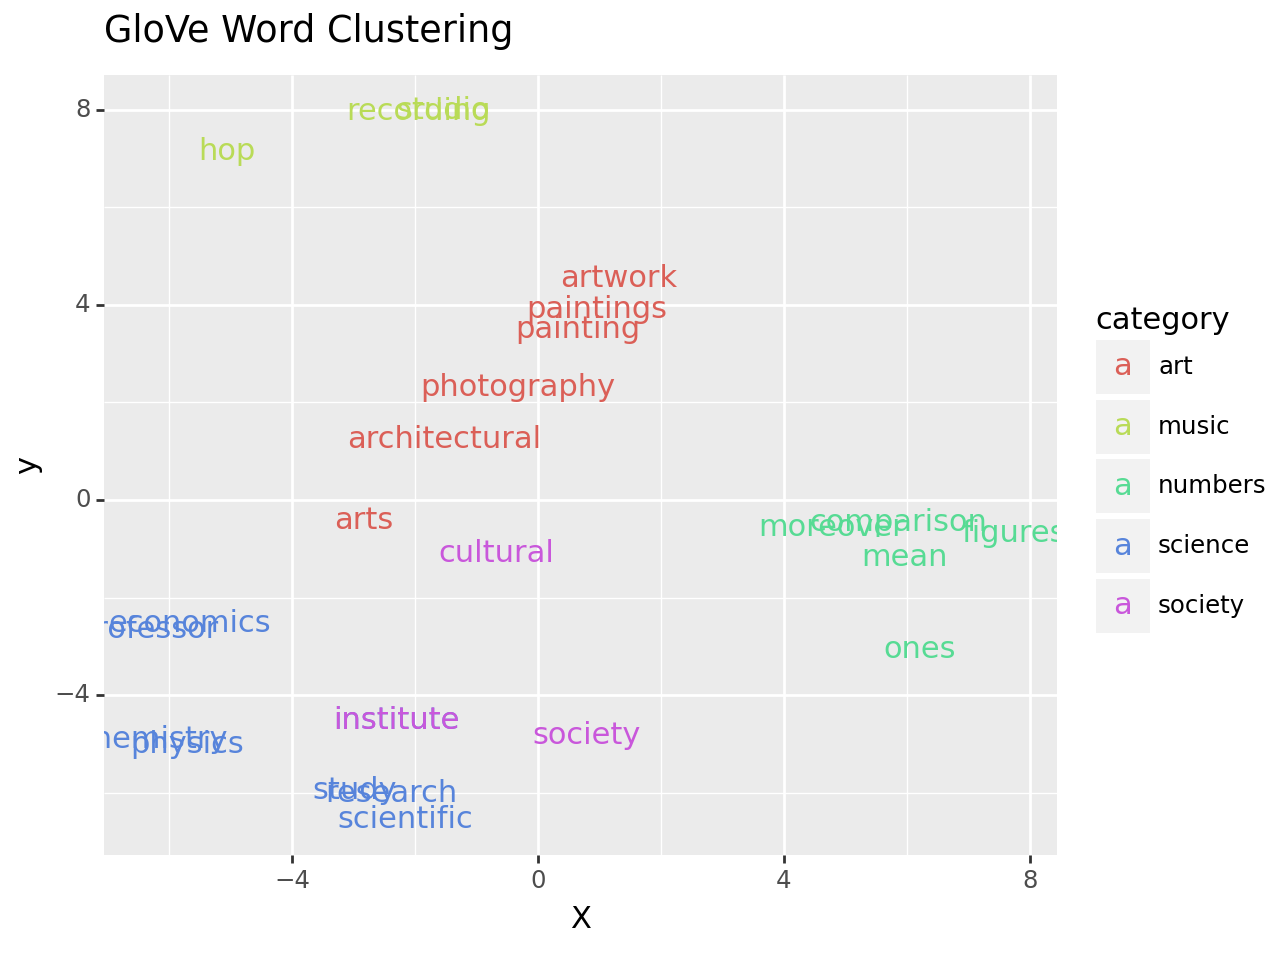

<Figure Size: (640 x 480)>

In [16]:
df_word_cloud['X'] = X_tsne[:, 0]
df_word_cloud['y'] = X_tsne[:, 1]

ggplot(data=df_word_cloud.sample(25)) + aes(x= 'X', y='y', label='word', color='category') + geom_text() + labs(title='GloVe Word Clustering')